In [1]:
import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Setting variables

In [2]:
yelp_path = 'C:/Users/Kamil/Desktop'

business_data_limit = None
review_data_limit = 10**7

business_path = os.path.join(yelp_path, 'yelp_academic_dataset_business.json')
review_path = os.path.join(yelp_path, 'yelp_academic_dataset_review.json')

### Load data

The method reads 'business_id' and 'categories' columns from the businesses file

In [3]:
def load_business_data(path, limit=None):
    business_data = {}
    with open(business_path, encoding='utf8') as file:
        for index, line in enumerate(file):
            if limit is not None and index >= limit:
                break

            row = json.loads(line)
            business_data[row['business_id']] = row['categories']
            
    return business_data

The method reads 'business_id' and 'text' columns from the reviews file and merging them with 'categories' column from business file

In [4]:
def load_review_data(path, business_data, limit=review_data_limit):
    data = []
    with open(review_path, encoding='utf8') as file:
        for index, line in enumerate(file):
            if limit is not None and index > limit:
                break

            row = json.loads(line)
            categories = business_data.get(row['business_id'])
            if categories is not None:
                categories = [category for category in categories.replace(' ', '').split(',')]
                data.append([row['text'], categories])      
                
    return data

The method loads data that are of the main_categories

In [5]:
def load_review_dict(path, business_data, main_categories, limit=review_data_limit):
    data = {category: [] for category in main_categories}
    
    with open(review_path, encoding='utf8') as file:
        for index, line in enumerate(file):
            if limit is not None and index > limit:
                break

            row = json.loads(line)
            categories = business_data.get(row['business_id'])
            if categories is not None:
                for category in [category for category in categories.replace(' ', '').split(',')]:
                    if category in data:
                        data[category].append(row['text'])
                
    return data

In [11]:
business_data = load_business_data(business_path, limit=business_data_limit)
review_data = load_review_data(review_path, business_data, limit=review_data_limit)

### Visualize data

The method take the categories with the most reviews and sorts them

In [6]:
def filter_sort(review_data, threshold=1000):
    categories_count = {}
    for data in review_data:
        categories = data[1]
        for category in categories:
            if category not in categories_count:
                categories_count[category] = 1
            else:
                categories_count[category] += 1
            
    category_count = [(category, count) for category, count in categories_count.items() if count > threshold]
    category_count.sort(key=lambda x : x[1], reverse=True)
    
    return category_count

The method visualizes filtered data

In [7]:
def visualize_data(filtered, limit=100):
    if len(filtered) > limit:
        filtered = filtered[0:limit]
    else:
        limit = len(filtered)
    
    y, x = zip(*filtered)
    plt.figure(figsize=(12, 0.25*len(y)))
    
    plt.plot(x, y, 'r.', label='The amount of reviews (points)')
    plt.plot(x, y, 'b', label='The amount of reviews (line)', linewidth=0.5)
    
    x_max = np.max(x)
    plt.xticks(np.arange(0, x_max, int(x_max/15.0)))
    
    plt.title(f'The plot shows the amount of reviews for {limit} best categories')
    plt.xlabel('Count')
    plt.ylabel('Categories')
    plt.legend()
    
    plt.show()

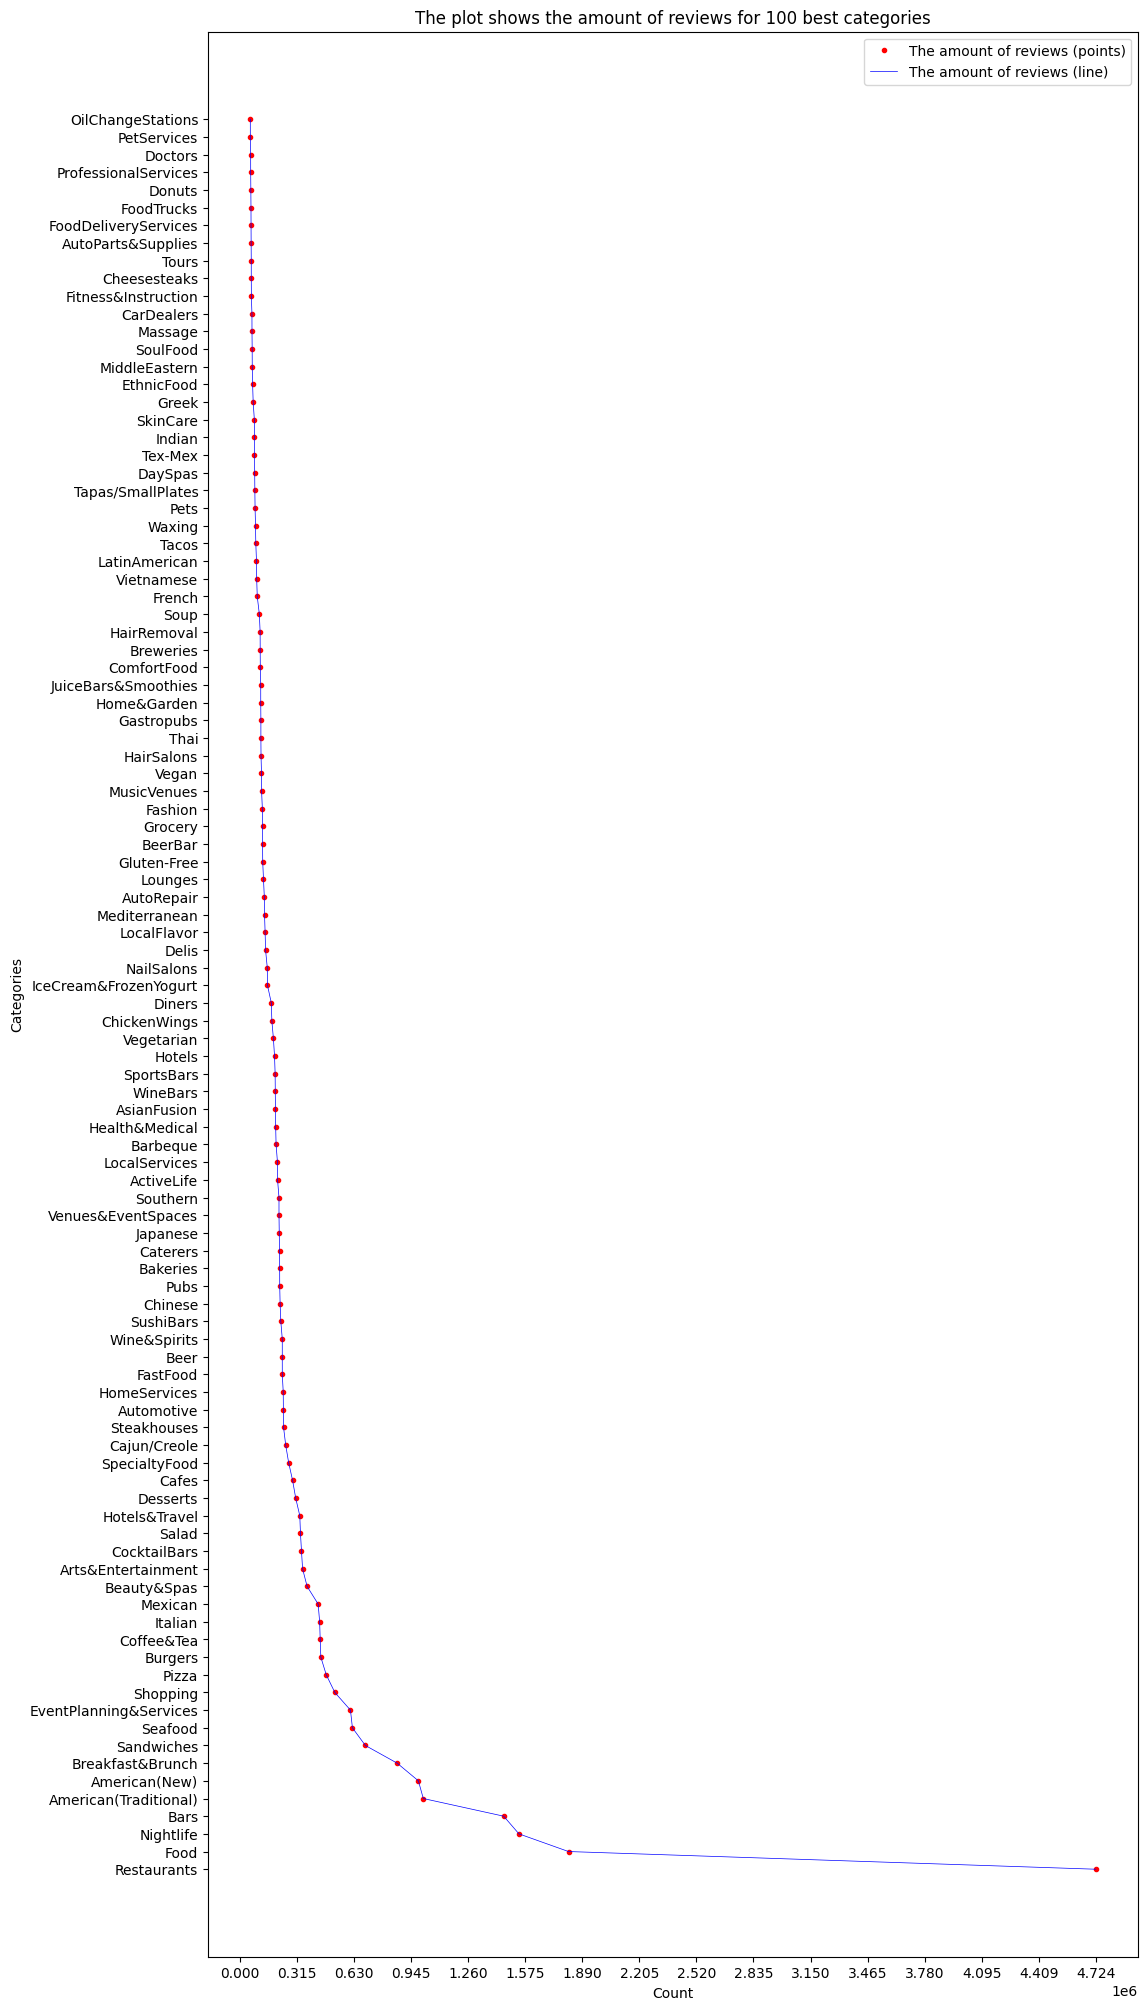

In [8]:
filtered = filter_sort(review_data)
visualize_data(filtered)

### Pick relevant categories with the most reviews

The following set is created by picking the most relevant categories with the most reviews from the above plot

In [8]:
main_categories = set([
    'Restaurants', 'Food', 'Nightlife', 'Bars', 
    'Breakfast&Brunch', 'Sandwiches', 'Seafood', 'EventPlanning&Services', 'Shopping', 'Pizza', 
    'Burgers', 'Coffee&Tea', 'Beauty&Spas', 'Arts&Entertainment', 
    'CocktailBars', 'Salad', 'Hotels&Travel', 'Desserts', 'Cafes', 'Automotive', 
    'HomeServices', 'FastFood', 'Beer', 'Wine&Spirits', 'SushiBars', 'Pubs', 'Bakeries', 'Caterers', 
    'Venues&EventSpaces', 'ActiveLife', 'LocalServices', 'Barbeque', 
    'Health&Medical', 'WineBars', 'SportsBars', 'Hotels', 'Vegetarian', 
    'IceCream&FrozenYogurt', 'NailSalons', 'LocalFlavor', 
    'AutoRepair', 'Lounges', 'Gluten-Free', 'Grocery', 
    'Fashion', 'MusicVenues', 'Vegan', 'HairSalons', 'Karaoke',
    'Home&Garden', 'JuiceBars&Smoothies', 'Pets', 'Massage', 'CarDealers', 'Fitness&Instruction', 
    'Tours', 'AutoParts&Supplies', 'FoodTrucks', 'Dance Clubs',
    'ProfessionalServices', 'Doctors', 'PetServices', 'Education'
])

In [9]:
print(f'Found {len(main_categories)} main categories')

Found 63 main categories


### Create training, validating & testing datasets

The method that truncates the amount of data

In [ ]:
def truncate_review_data(review_data, limit=3000):
    for category, data in review_data:
        if len(data) > limit:
            data = data[0:limit+1]

Load data with the chosen categories

In [12]:
review_data = load_review_dict(review_path, business_data, main_categories, limit=review_data_limit)

Truncate the data by picking random elements

In [ ]:
review_data_2 = truncate_review_data(review_data)